In [27]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display

# 1. Data import

In [11]:
os.getcwd()
os.chdir("../Data")
print(os.getcwd())

D:\Travail\Centrale\Projet\Data


In [12]:
data_path = "commonvoice_example"

In [13]:
!dir $data_path

 Le volume dans le lecteur D s'appelle WindowsDrive
 Le num‚ro de s‚rie du volume est B229-5CDC

 R‚pertoire de D:\Travail\Centrale\Projet\Data\commonvoice_example

19/11/2020  15:19    <DIR>          .
19/11/2020  15:19    <DIR>          ..
22/03/2020  00:17            32ÿ058 common_voice_en_62600_0.wav
22/03/2020  00:20            32ÿ058 common_voice_en_62600_14.wav
22/03/2020  00:19            32ÿ058 common_voice_en_62600_2.wav
22/03/2020  00:34            32ÿ058 common_voice_en_62600_4.wav
19/11/2020  14:23        55ÿ473ÿ765 labels.tsv
               5 fichier(s)       55ÿ601ÿ997 octets
               2 R‚p(s)  303ÿ963ÿ660ÿ288 octets libres


In [14]:
file = "common_voice_en_62600_14.wav"

In [15]:
data, samplerate = librosa.load(data_path+os.sep + file) #tuple : 1rst elem = numpy array, 2nd elem = sample freq 

In [19]:
labels = pd.read_csv(data_path+os.sep+'labels.tsv',sep="\t").drop(columns= "Unnamed: 0")

# 2. Format of the data

In [20]:
display(data) #array of our signal

array([ 2.1125017e-15, -2.0042771e-11, -7.6854148e-11, ...,
        8.1792351e-08, -5.8857734e-07, -7.2443328e-07], dtype=float32)

In [21]:
#to play the sound file
import simpleaudio as sa
sa.play_buffer(data.astype(np.int16),1,2,samplerate)

Text(0.5, 1.0, 'Fourier Tranformation of the signal (dB)')

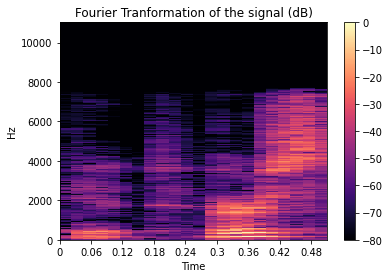

In [22]:
# plot of the fourier transform
fourier = librosa.stft(data)
fourier_db = librosa.amplitude_to_db(np.abs(fourier), ref=np.max)

plt.figure()
librosa.display.specshow(fourier_db, x_axis='time', y_axis='linear')
plt.colorbar()
plt.title("Fourier Tranformation of the signal (dB)")

In [23]:
# get the according labels

sound_id = file[:-4]
print(sound_id) # sound_id, to relate to the labels

display(labels.loc[labels['sound_id']==sound_id])

common_voice_en_62600_14


,Unnamed: 0.1,age,gender,accent,original_sentence,sentence,client_id,sound_id,intervals
29814,2523296,thirties,male,us,A person on a blue bench under a blue blanket.,blanket person,0a0f10d1306657ff2506f99a92144d8f01895d0a66b6fe...,common_voice_en_62600_14,"([(0.0, 0.020000000000000018, 'padding', ''), ..."


# 3. Overview of labeling

In [24]:
display(labels) #we get the accent, the gender, the age of the locutor, and the sentence

,Unnamed: 0.1,age,gender,accent,original_sentence,sentence,client_id,sound_id,intervals
0,75927,fourties,male,canada,The baronetcy is currently held by his grandso...,grandson john,eb005db5c7d0333c500a250c5a3551d95d93d62d4afbfc...,common_voice_en_18721929_34,"([(0.0, 0.015000000000000124, 'padding', ''), ..."
1,1478669,twenties,male,indian,"Only one speaker survives in Nepal, an elderly...",only one speaker,3b502c26e0b05c4f38b556d6f666397e50cf2152bea373...,common_voice_en_18723654_8,"([(0.0, 0.020000000000000018, 'padding', ''), ..."
2,340793,sixties,male,us,I’m too happy; and yet I’m not happy enough.,enough and yet,953bbec74b68f4a24ca1c70200631938c6554133b64974...,common_voice_en_18548669_19,"([(0.0, 0.025000000000000355, 'padding', ''), ..."
3,129304,thirties,male,us,"Over the next decade, the college added Africa...",college added african,a8ce1885a19d337fac4f60f2178f5f9f7d5b3c8e231437...,common_voice_en_18879914_4,"([(0.0, 0.03500000000000014, 'padding', ''), (..."
4,114978,twenties,male,us,During the American War of Independence the Go...,chester independence,97c8ac97359d907568354048899b57c3caa29bc4bce205...,common_voice_en_18843920_55,"([(0.0, 0.019999999999999574, 'padding', ''), ..."
...,...,...,...,...,...,...,...,...,...
83881,133676,twenties,female,us,"""The Star"" is better known as ""Twinkle Twinkle...",star better known as,fefdf541ed91b86082b064fe4b4de91161e654b7eb0aa5...,common_voice_en_18890858_23,"([(0.0, 0.009999999999999787, 'padding', ''), ..."
83882,133327,twenties,female,us,His works have been translated into fifteen la...,languages been translated,fefdf541ed91b86082b064fe4b4de91161e654b7eb0aa5...,common_voice_en_18890851_40,"([(0.0, 0.009999999999999787, 'padding', ''), ..."
83883,133682,twenties,female,us,"""The Star"" is better known as ""Twinkle Twinkle...",star as,fefdf541ed91b86082b064fe4b4de91161e654b7eb0aa5...,common_voice_en_18890858_29,"([(0.0, 0.009999999999999787, 'padding', ''), ..."
83884,133566,twenties,female,us,"Featured animals include electric eel, chamber...",octopus,fefdf541ed91b86082b064fe4b4de91161e654b7eb0aa5...,common_voice_en_18890856_105,"([(0.0, 0.06500000000000039, 'padding', ''), (..."


In [25]:
labels['age'].value_counts()

twenties     32793
thirties     19751
fourties     10584
fifties       7810
teens         6643
sixties       4868
seventies     1264
nineties        89
eighties        84
Name: age, dtype: int64

In [59]:
labels['gender'].value_counts()

male      43940
female    39946
Name: gender, dtype: int64

In [60]:
labels['accent'].value_counts()

us             43783
indian         11029
england        10111
canada          7193
australia       4329
philippines     1282
ireland         1135
scotland        1017
african         1010
hongkong         770
malaysia         662
wales            425
newzealand       423
singapore        367
other            283
bermuda           67
Name: accent, dtype: int64

In [61]:
labels['sentence'].value_counts()

university            38
technology            28
street                28
california            20
united states         17
                      ..
colleague scottish     1
face suicidal          1
with drawback          1
last important         1
unison and sandals     1
Name: sentence, Length: 68324, dtype: int64

In [68]:
labels['client_id'].drop_duplicates() # seems to be the directory in the 'sample' directory
#related to batch size ?

0        eb005db5c7d0333c500a250c5a3551d95d93d62d4afbfc...
1        3b502c26e0b05c4f38b556d6f666397e50cf2152bea373...
2        953bbec74b68f4a24ca1c70200631938c6554133b64974...
3        a8ce1885a19d337fac4f60f2178f5f9f7d5b3c8e231437...
4        97c8ac97359d907568354048899b57c3caa29bc4bce205...
                               ...                        
81961    f8aeba2aeff7b503811c0e31c76dba7865837f19b44c77...
82346    f8eac24c10bd04b053c0d25c25e83f04211757d55655e5...
82731    f8f76b94170a19421464ac1a3b62a926edae4cb12a0a39...
83116    fcb16bb0d63a8ef9999d7f8c2c0667ed7e9db67563df59...
83501    fefdf541ed91b86082b064fe4b4de91161e654b7eb0aa5...
Name: client_id, Length: 697, dtype: object